In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn import metrics


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('adult_dataset.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
len(df[df['workclass'] == '?'])

1836

In [6]:
len(df)

32561

In [7]:
1836/32561

0.05638647461687295

In [8]:
df = df[df['workclass'] != '?']

In [9]:
len(df[df['workclass'] == '?'])

0

In [10]:
df.apply(lambda x : x == '?' ).sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [12]:
df_categorical = df.select_dtypes(include=['object'])

In [13]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [14]:
df_categorical.apply(lambda x : x=='?').sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [15]:
df_categorical = df_categorical[df_categorical['occupation']!= '?']
df_categorical = df_categorical[df_categorical['native.country']!= '?']

In [16]:
df_categorical.head(
)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [19]:
from sklearn.preprocessing import LabelEncoder

enco = LabelEncoder()

df_categorical = df_categorical.apply(enco.fit_transform)

In [21]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [47]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 9 columns):
workclass         30162 non-null int32
education         30162 non-null int32
marital.status    30162 non-null int32
occupation        30162 non-null int32
relationship      30162 non-null int32
race              30162 non-null int32
sex               30162 non-null int32
native.country    30162 non-null int32
income            30162 non-null int32
dtypes: int32(9)
memory usage: 1.3 MB


In [48]:
df.drop(df_categorical.columns,axis=1,inplace=True)

In [50]:
df = pd.concat([df,df_categorical],axis=1)


In [51]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2.0,11.0,6.0,3.0,1.0,4.0,0.0,38.0,0.0
3,54,140359,4,0,3900,40,2.0,5.0,0.0,6.0,4.0,4.0,0.0,38.0,0.0
4,41,264663,10,0,3900,40,2.0,15.0,5.0,9.0,3.0,4.0,0.0,38.0,0.0
5,34,216864,9,0,3770,45,2.0,11.0,0.0,7.0,4.0,4.0,0.0,38.0,0.0
6,38,150601,6,0,3770,40,2.0,0.0,5.0,0.0,4.0,4.0,1.0,38.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
fnlwgt            30725 non-null int64
education.num     30725 non-null int64
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
workclass         30162 non-null float64
education         30162 non-null float64
marital.status    30162 non-null float64
occupation        30162 non-null float64
relationship      30162 non-null float64
race              30162 non-null float64
sex               30162 non-null float64
native.country    30162 non-null float64
income            30162 non-null float64
dtypes: float64(9), int64(6)
memory usage: 3.8 MB


In [53]:
df['income'] = df['income'].astype('category')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
fnlwgt            30725 non-null int64
education.num     30725 non-null int64
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
workclass         30162 non-null float64
education         30162 non-null float64
marital.status    30162 non-null float64
occupation        30162 non-null float64
relationship      30162 non-null float64
race              30162 non-null float64
sex               30162 non-null float64
native.country    30162 non-null float64
income            30162 non-null category
dtypes: category(1), float64(8), int64(6)
memory usage: 3.5 MB


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
y= df.pop('income')
X = df

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [58]:
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
21740,47,160647,9,0,0,40,0.0,11.0,5.0,0.0,4.0,4.0,0.0,38.0
29965,33,272411,13,0,0,40,2.0,9.0,4.0,3.0,1.0,4.0,0.0,38.0
3320,47,329144,9,4386,0,45,2.0,11.0,2.0,11.0,0.0,4.0,1.0,38.0
1303,50,188186,14,0,1590,45,2.0,12.0,0.0,11.0,1.0,4.0,0.0,38.0
7899,29,237865,14,0,0,40,2.0,12.0,4.0,13.0,3.0,2.0,1.0,38.0


In [59]:
tree = DecisionTreeClassifier(max_depth=5)

In [73]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
X_test.dropna(inplace=True)

In [77]:
y_test.dropna(inplace=True)

In [79]:
X_test = X_test[X_test.columns].astype('int64')

In [80]:
y_pred = tree.predict(X_test)

In [82]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      8287
         1.0       0.54      0.79      0.64      1690

    accuracy                           0.85      9977
   macro avg       0.74      0.83      0.77      9977
weighted avg       0.88      0.85      0.86      9977



In [85]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[7124  350]
 [1163 1340]]
0.8483512077778892


In [99]:
param_grid = {'max_depth':range(5,15,5),
             'min_samples_leaf':range(50,150,50),
             'min_samples_split': range(50, 150, 50),
             'criterion': ["entropy", "gini"]
             }

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(param_grid = param_grid,estimator=dtree,cv=5,verbose=6,return_train_score=True)

In [100]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, score=(train=0.848, test=0.848), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, score=(train=0.843, test=0.844), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, score=(train=0.843, test=0.844), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, score=(train=0.851, test=0.838), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, score=(train=0.843, test=0.844), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, score=(train=0.843, test=0.844), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, score=(train=0.851, test=0.838), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, score=(train=0.849, test=0.850), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=100, min_samples_split=50, score=(train=0.848, test=0.848), total=   0.0s
[CV] criterion=entropy, max_dep

[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, score=(train=0.848, test=0.850), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, score=(train=0.848, test=0.851), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, score=(train=0.851, test=0.837), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, score=(train=0.848, test=0.851), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=100, score=(train=0.848, test=0.848), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [89]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [90]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026025,6.217196e-07,0.001001,1.907349e-07,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843696,0.844439,0.837751,0.849889,0.844835,0.004240,13
1,0.027025,3.524317e-03,0.001200,4.001387e-04,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843696,0.844439,0.837751,0.849889,0.844835,0.004240,13
2,0.027622,2.730079e-03,0.001001,2.336015e-07,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843200,0.843448,0.836512,0.851127,0.844538,0.005015,15
3,0.026023,3.371748e-07,0.001002,4.768372e-07,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843200,0.843448,0.836512,0.851127,0.844538,0.005015,15
4,0.042241,3.993145e-04,0.001001,3.504023e-07,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,0.849641,0.852118,0.833787,0.853356,0.848055,0.007235,5
5,0.044035,2.899668e-03,0.001003,5.015638e-06,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,0.849641,0.852118,0.833787,0.853356,0.848055,0.007235,5
6,0.039640,4.985977e-04,0.001601,4.899990e-04,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,0.850384,0.852861,0.828833,0.852613,0.845529,0.009087,11
7,0.039236,3.999951e-04,0.001201,4.004241e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,0.850384,0.852861,0.828833,0.852613,0.845529,0.009087,11
8,0.022421,4.902131e-04,0.001201,4.003763e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,0.850879,0.852366,0.837751,0.852118,0.848303,0.005460,3
9,0.022620,8.006932e-04,0.001001,3.504023e-07,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,0.850879,0.852366,0.837751,0.852118,0.848303,0.005460,3


In [103]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025836,0.000753,0.000995,8.392063e-06,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844835,0.004240,13,0.848402,0.843386,0.843200,0.851127,0.848960,0.847015,0.003173
1,0.025822,0.000399,0.001001,4.623108e-07,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844835,0.004240,13,0.848402,0.843386,0.843200,0.851127,0.848960,0.847015,0.003173
2,0.025823,0.000400,0.001201,4.004480e-04,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844538,0.005015,15,0.848402,0.842953,0.842891,0.850941,0.848093,0.846656,0.003205
3,0.024422,0.000801,0.001001,6.641573e-07,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844538,0.005015,15,0.848402,0.842953,0.842891,0.850941,0.848093,0.846656,0.003205
4,0.042437,0.002336,0.001001,3.234067e-07,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,...,0.848055,0.007235,5,0.854967,0.854347,0.856391,0.857815,0.852489,0.855202,0.001810
5,0.043639,0.003263,0.001401,8.004189e-04,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,...,0.848055,0.007235,5,0.854967,0.854347,0.856391,0.857815,0.852489,0.855202,0.001810
6,0.039636,0.000801,0.001201,4.002810e-04,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,...,0.845529,0.009087,11,0.851808,0.851561,0.851065,0.854781,0.849827,0.851808,0.001636
7,0.039436,0.000484,0.001401,4.904465e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,...,0.845529,0.009087,11,0.851808,0.851561,0.851065,0.854781,0.849827,0.851808,0.001636
8,0.023224,0.000399,0.001201,3.998759e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,...,0.848303,0.005460,3,0.848898,0.848650,0.848340,0.851127,0.849022,0.849207,0.000988
9,0.023221,0.001471,0.001004,5.135693e-06,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,...,0.848303,0.005460,3,0.848898,0.848650,0.848340,0.851127,0.849022,0.849207,0.000988


In [92]:
grid_search.c

0.8502353232598464

In [93]:
dtree1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
scores = grid_search.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025836,0.000753,0.000995,8.392063e-06,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844835,0.004240,13,0.848402,0.843386,0.843200,0.851127,0.848960,0.847015,0.003173
1,0.025822,0.000399,0.001001,4.623108e-07,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844835,0.004240,13,0.848402,0.843386,0.843200,0.851127,0.848960,0.847015,0.003173
2,0.025823,0.000400,0.001201,4.004480e-04,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844538,0.005015,15,0.848402,0.842953,0.842891,0.850941,0.848093,0.846656,0.003205
3,0.024422,0.000801,0.001001,6.641573e-07,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,...,0.844538,0.005015,15,0.848402,0.842953,0.842891,0.850941,0.848093,0.846656,0.003205
4,0.042437,0.002336,0.001001,3.234067e-07,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,...,0.848055,0.007235,5,0.854967,0.854347,0.856391,0.857815,0.852489,0.855202,0.001810
5,0.043639,0.003263,0.001401,8.004189e-04,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,...,0.848055,0.007235,5,0.854967,0.854347,0.856391,0.857815,0.852489,0.855202,0.001810
6,0.039636,0.000801,0.001201,4.002810e-04,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,...,0.845529,0.009087,11,0.851808,0.851561,0.851065,0.854781,0.849827,0.851808,0.001636
7,0.039436,0.000484,0.001401,4.904465e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,...,0.845529,0.009087,11,0.851808,0.851561,0.851065,0.854781,0.849827,0.851808,0.001636
8,0.023224,0.000399,0.001201,3.998759e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,...,0.848303,0.005460,3,0.848898,0.848650,0.848340,0.851127,0.849022,0.849207,0.000988
9,0.023221,0.001471,0.001004,5.135693e-06,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,...,0.848303,0.005460,3,0.848898,0.848650,0.848340,0.851127,0.849022,0.849207,0.000988


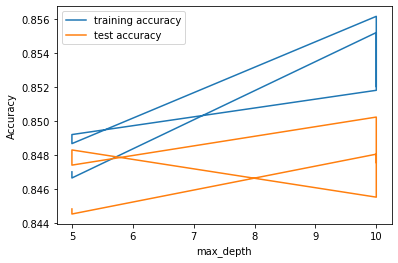

In [116]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [123]:
# Create the parameter grid 
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [124]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058696,0.000782,0.001601,4.908753e-04,5,{'min_samples_split': 5},0.806540,0.807035,0.810751,0.813971,...,0.811791,0.005190,10,0.968851,0.970275,0.969594,0.970151,0.969718,0.969718,0.000503
1,0.055067,0.000660,0.001601,4.899215e-04,25,{'min_samples_split': 25},0.832549,0.826108,0.831558,0.830815,...,0.832400,0.004823,9,0.909710,0.909339,0.910268,0.908162,0.906428,0.908781,0.001364
2,0.053647,0.001020,0.001401,4.903491e-04,45,{'min_samples_split': 45},0.842953,0.837503,0.838246,0.837255,...,0.838940,0.002075,8,0.891813,0.895529,0.890760,0.892432,0.891504,0.892408,0.001651
3,0.052650,0.000799,0.001001,1.168008e-07,65,{'min_samples_split': 65},0.847164,0.839732,0.842705,0.838494,...,0.841417,0.003224,7,0.883391,0.885868,0.881781,0.883948,0.881843,0.883366,0.001512
4,0.051061,0.001091,0.001401,4.903686e-04,85,{'min_samples_split': 85},0.845925,0.846173,0.848898,0.839485,...,0.845281,0.003108,6,0.878313,0.880542,0.877446,0.879118,0.878003,0.878685,0.001075


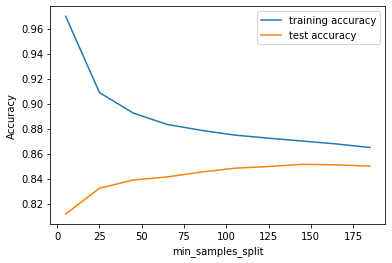

In [125]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [126]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [127]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026826,0.000745,0.001201,4.005197e-04,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843696,0.844439,0.837751,0.849889,0.844835,0.004240,13
1,0.026224,0.000981,0.001001,3.504023e-07,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843696,0.844439,0.837751,0.849889,0.844835,0.004240,13
2,0.025427,0.000492,0.001001,4.156970e-07,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843200,0.843448,0.836512,0.851127,0.844538,0.005015,15
3,0.025574,0.000471,0.001001,3.234067e-07,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.848402,0.843200,0.843448,0.836512,0.851127,0.844538,0.005015,15
4,0.042035,0.000005,0.001201,4.005196e-04,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,0.849641,0.852118,0.833787,0.853356,0.848055,0.007235,5
5,0.042041,0.000632,0.001199,4.018602e-04,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851375,0.849641,0.852118,0.833787,0.853356,0.848055,0.007235,5
6,0.040944,0.002835,0.001606,4.939225e-04,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,0.850384,0.852861,0.828833,0.852613,0.845529,0.009087,11
7,0.039397,0.000475,0.001203,4.000473e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842953,0.850384,0.852861,0.828833,0.852613,0.845529,0.009087,11
8,0.022404,0.000487,0.001202,4.003288e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,0.850879,0.852366,0.837751,0.852118,0.848303,0.005460,3
9,0.022344,0.000409,0.001102,2.026320e-04,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.848402,0.850879,0.852366,0.837751,0.852118,0.848303,0.005460,3


In [128]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8502353232598464
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [129]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [130]:
clf_gini.score(X_test,y_test)

0.8483512077778892

In [131]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8364237746817681


In [132]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      7474
         1.0       0.78      0.48      0.60      2503

    accuracy                           0.84      9977
   macro avg       0.81      0.72      0.75      9977
weighted avg       0.83      0.84      0.82      9977



In [133]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7132  342]
 [1290 1213]]


In [136]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression
estimators = list(range(1, 100, 3))
abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=clf_gini, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [141]:
abc_scores

[0.8364237746817681,
 0.8458454445224015,
 0.8523604289866693,
 0.8589756439811567,
 0.8617820988273028,
 0.8628846346597173,
 0.864989475794327,
 0.8648892452641075,
 0.8647890147338879,
 0.865791320036083,
 0.865390397915205,
 0.865991781096522,
 0.8650897063245464,
 0.8648892452641075,
 0.8639871704921319,
 0.8628846346597173,
 0.8631853262503759,
 0.8637867094316929,
 0.8639871704921319,
 0.8639871704921319,
 0.8631853262503759,
 0.8627844041294979,
 0.8634860178410344,
 0.8646887842036685,
 0.8645885536734489,
 0.8648892452641075,
 0.8650897063245464,
 0.8638869399619123,
 0.8627844041294979,
 0.8622832514784003,
 0.8611807156459858,
 0.8620827904179613,
 0.8613811767064248]

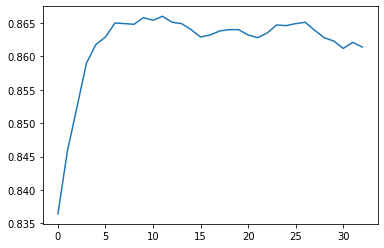

In [142]:
plt.plot(abc_scores)

In [144]:
abc_scores_lr

[0.6208896126895518,
 0.6351394916947937,
 0.6475597225528992,
 0.6525462460835063,
 0.6530767574495299,
 0.6532755822795893,
 0.6543403468420181,
 0.6547408028749231,
 0.655074360326078,
 0.6556067426072925,
 0.655939364600852,
 0.6566724426273166,
 0.6573386220720311,
 0.6580048015167457,
 0.6582714603861505,
 0.6584052575496506,
 0.6587388150008056,
 0.6596707178573296,
 0.6597376164390796,
 0.6596707178573296,
 0.660269998720294,
 0.660336897302044,
 0.6606026207138536,
 0.6608702150408539,
 0.6603378327596394,
 0.6614035327796637,
 0.6621375462637236,
 0.6625370668390332,
 0.6626039654207834,
 0.6625370668390332,
 0.6629365874143428,
 0.6634030065714025,
 0.6636018314014619]

In [150]:
ABC = AdaBoostClassifier(base_estimator=clf_gini,learning_rate=0.5,algorithm='SAMME')

In [151]:
param_g = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [152]:
grid_cv = GridSearchCV(ABC,param_grid=param_g,scoring='roc_auc',return_train_score=True,n_jobs=-1)

In [153]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=50,
                                                                               

In [154]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.176678,0.047777,0.074633,0.002317,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.909722,0.909092,0.911034,0.909949,0.000809,6,0.912916,0.915425,0.912828,0.913723,0.001204
1,4.131547,0.008965,0.135790,0.023120,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.911535,0.910796,0.912665,0.911666,0.000769,5,0.914149,0.917476,0.915710,0.915778,0.001359
2,6.051105,0.060973,0.147632,0.001225,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.914708,0.913656,0.914093,0.914152,0.000432,4,0.916850,0.921006,0.917117,0.918324,0.001899
3,4.306373,0.119767,0.064731,0.001696,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.919807,0.919487,0.920281,0.919858,0.000326,3,0.930154,0.932927,0.931679,0.931587,0.001134
4,8.091660,0.083165,0.118132,0.001630,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.920621,0.920514,0.921560,0.920898,0.000470,1,0.936834,0.936605,0.936226,0.936555,0.000251
5,12.022926,0.060417,0.175488,0.002631,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.920100,0.920631,0.921159,0.920630,0.000432,2,0.942834,0.941751,0.939568,0.941384,0.001358


In [155]:

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


KeyError: 'base_estimator__max_depth'

<Figure size 1152x432 with 0 Axes>

In [156]:
grid_cv.best_score_

0.9208984515327578

In [157]:
xg_model = XGBClassifier()


In [158]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [160]:
xg_model.score(X_test,y_test)

0.8594767966322542

In [161]:
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

IndexError: too many indices for array

In [162]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [163]:
model_cv.fit(X_train, y_train)     

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   21.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [164]:
model_cv.score(X_test,y_test)

0.9231647471254991

In [ ]:
xg_model()